In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras import regularizers, optimizers 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


In [4]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test  = x_test/255.0

In [5]:
# model - 12 layer - relu
model5 = keras.models.Sequential()
model5.add(tf.keras.Input(shape=(32, 32, 3)))

model5.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.MaxPooling2D(2))

model5.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.MaxPooling2D(2))

model5.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.MaxPooling2D(2))

model5.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model5.add(keras.layers.MaxPooling2D(2))

# flatten
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(512, activation='relu'))
model5.add(keras.layers.Dense(10, activation='softmax'))
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [6]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history5 = model5.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 35s - loss: 2.3068 - sparse_categorical_accuracy: 0.1008 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 35s/epoch - 180ms/step
Epoch 2/100
196/196 - 21s - loss: 2.3028 - sparse_categorical_accuracy: 0.0980 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 21s/epoch - 107ms/step
Epoch 3/100
196/196 - 21s - loss: 2.3027 - sparse_categorical_accuracy: 0.0957 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 21s/epoch - 106ms/step
Epoch 4/100
196/196 - 21s - loss: 2.3027 - sparse_categorical_accuracy: 0.0978 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 21s/epoch - 107ms/step
Epoch 5/100
196/196 - 21s - loss: 2.3027 - sparse_categorical_accuracy: 0.0981 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 21s/epoch - 108ms/step
Epoch 6/100
196/196 - 21s - loss: 2.3027 - sparse_categorical_accuracy: 0.0993 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 21s/epoch - 107ms/step
Epoch 7/10

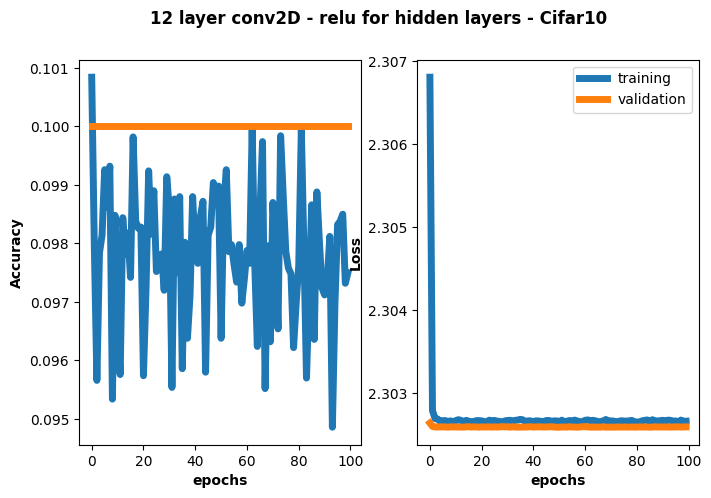

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (8,5))
axs[0].plot(range(len(history5.history['sparse_categorical_accuracy'])), history5.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history5.history['val_sparse_categorical_accuracy'])), history5.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history5.history['loss'])), history5.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history5.history['val_loss'])), history5.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("12 layer conv2D - relu for hidden layers - Cifar10", fontweight = 'bold')
plt.show()

In [5]:
# model - 12 layer - relu - batch normalization
model6 = keras.models.Sequential()
model6.add(tf.keras.Input(shape=(32, 32, 3)))

model6.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(2))

model6.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(2))

model6.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(2))

model6.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(2))

# flatten
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(512, activation='relu'))
model6.add(keras.layers.Dense(10, activation='softmax'))
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       2

In [6]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model6.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history6 = model6.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 39s - loss: 1.5846 - sparse_categorical_accuracy: 0.4819 - val_loss: 3.1081 - val_sparse_categorical_accuracy: 0.1180 - 39s/epoch - 198ms/step
Epoch 2/100
196/196 - 35s - loss: 0.8847 - sparse_categorical_accuracy: 0.6883 - val_loss: 2.9037 - val_sparse_categorical_accuracy: 0.3191 - 35s/epoch - 181ms/step
Epoch 3/100
196/196 - 35s - loss: 0.6601 - sparse_categorical_accuracy: 0.7716 - val_loss: 7.9207 - val_sparse_categorical_accuracy: 0.1012 - 35s/epoch - 181ms/step
Epoch 4/100
196/196 - 36s - loss: 0.5341 - sparse_categorical_accuracy: 0.8174 - val_loss: 0.8316 - val_sparse_categorical_accuracy: 0.7363 - 36s/epoch - 182ms/step
Epoch 5/100
196/196 - 36s - loss: 0.4485 - sparse_categorical_accuracy: 0.8472 - val_loss: 0.7248 - val_sparse_categorical_accuracy: 0.7640 - 36s/epoch - 184ms/step
Epoch 6/100
196/196 - 36s - loss: 0.3653 - sparse_categorical_accuracy: 0.8740 - val_loss: 1.0057 - val_sparse_categorical_accuracy: 0.7066 - 36s/epoch - 184ms/step
Epoch 7/10

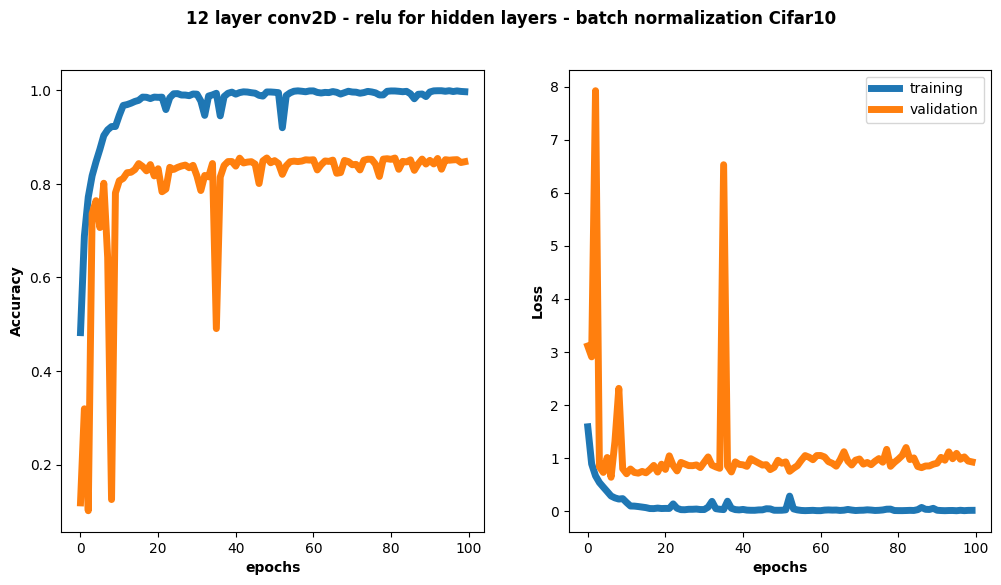

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(history6.history['sparse_categorical_accuracy'])), history6.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history6.history['val_sparse_categorical_accuracy'])), history6.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history6.history['loss'])), history6.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history6.history['val_loss'])), history6.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("12 layer conv2D - relu for hidden layers - batch normalization Cifar10", fontweight = 'bold')
plt.show()